In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from readImage  import Video, height, width
from tools      import benchmark
from Difference_image import Difference_image_compute, Difference_image_reverse
from LZW        import LZW_encode, LZW_decode
from Huffman    import Huffman_encode, Huffman_decode
from DCT        import DCT_compute, DCT_inverse


# Format for qcif images
width = 176
height = 144
frame_size = width*height + 2*width//2*height//2

videos_names = []
for fname in os.listdir("./videos"):
    if fname.endswith(".qcif"):
        videos_names.append("./videos/"+fname)

In [2]:
video = Video(videos_names[0])
y,u,v = video.read_img()
frame = np.concatenate((y.flatten(),u.flatten(),v.flatten()))

In [3]:
res=DCT_compute(frame)
res2 = DCT_inverse(res)[0]

DCT: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


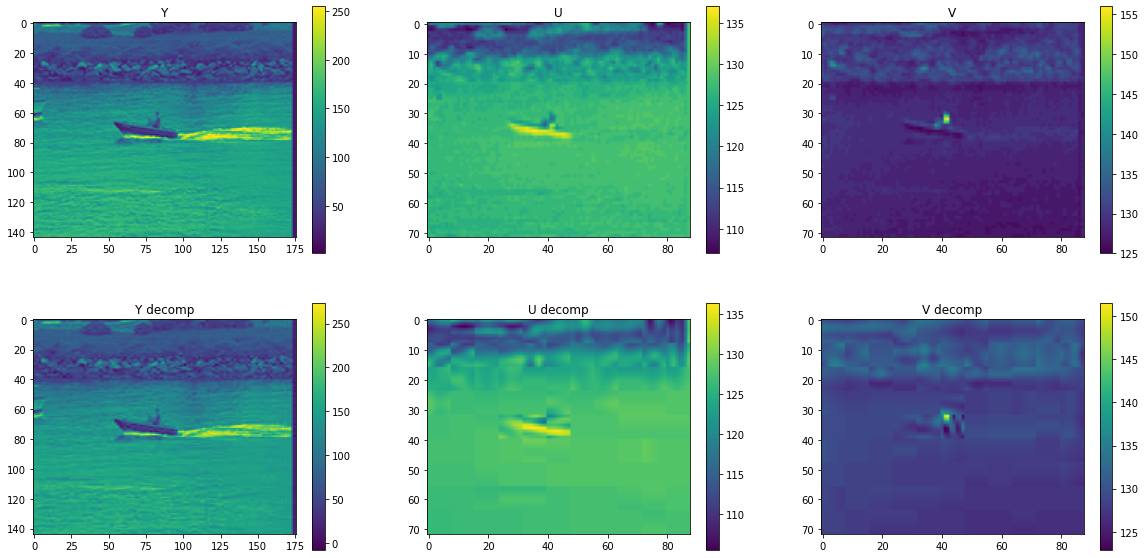

In [4]:
y2 = res2[:width*height].reshape(height,width)
u2 = res2[width*height:width*height+width//2*height//2].reshape(height//2,width//2)
v2 = res2[width*height+width//2*height//2:2*width*height+width//2*height//2].reshape(height//2,width//2)

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.imshow(y)
plt.colorbar()
plt.title("Y")
plt.subplot(2,3,2)
plt.imshow(u)
plt.colorbar()
plt.title("U")
plt.subplot(2,3,3)
plt.imshow(v)
plt.colorbar()
plt.title("V")

plt.subplot(2,3,4)
plt.imshow(y2)
plt.colorbar()
plt.title("Y decomp")
plt.subplot(2,3,5)
plt.imshow(u2)
plt.colorbar()
plt.title("U decomp")
plt.subplot(2,3,6)
plt.imshow(v2)
plt.colorbar()
plt.title("V decomp")

plt.show()